In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

import qnmfits
import utils

from cmcrameri import cm

plt.rcParams.update(utils.rcparams)

In [2]:
sim_info = utils.load_cce_data(1)
sim = sim_info['sim']
chif = sim.chif_mag
Mf = sim.Mf

In [3]:
N = 20
qnm_list = [(2, 2, n, 1) for n in range(N+1)]

In [4]:
sim_info = utils.t0N_finder(sim_info, 18)

Calculating for n = 0
Calculating for n = 1
Calculating for n = 2
Calculating for n = 3
Calculating for n = 4
Calculating for n = 5
Calculating for n = 6
Calculating for n = 7
Calculating for n = 8
Calculating for n = 9
Calculating for n = 10
Calculating for n = 11
Calculating for n = 12
Calculating for n = 13
Calculating for n = 14
Calculating for n = 15
Calculating for n = 16
Calculating for n = 17
Calculating for n = 18


In [5]:
np.array([t0[0] for t0 in sim_info['t0_list']])

array([44.20783327, 18.20015913, 11.71703857,  7.81237533,  5.00054643,
        2.8129141 ,  1.01573996, -0.46877378, -1.71876718, -2.89052637,
       -3.82786242, -4.76515618, -5.54618949, -6.32719034, -7.03007576,
       -7.65485676, -8.27962732, -8.8262962 , -8.59200996])

In [6]:
np.diff(np.array([t0[0] for t0 in sim_info['t0_list']]))

array([-26.00767414,  -6.48312056,  -3.90466323,  -2.81182891,
        -2.18763233,  -1.79717414,  -1.48451374,  -1.2499934 ,
        -1.17175919,  -0.93733605,  -0.93729375,  -0.78103331,
        -0.78100085,  -0.70288542,  -0.624781  ,  -0.62477056,
        -0.54666888,   0.23428624])

In [7]:
N_fit = 17
t0 = sim_info['t0_list'][N_fit][0]

qnm_list_fit = [(2, 2, n, 1) for n in range(N_fit+1)]

In [8]:
best_fit = qnmfits.ringdown_fit(
    sim.times,
    sim.h[2,2],
    modes=qnm_list_fit,
    Mf=Mf,
    chif=chif,
    t0=t0,
    t0_method='closest'
)

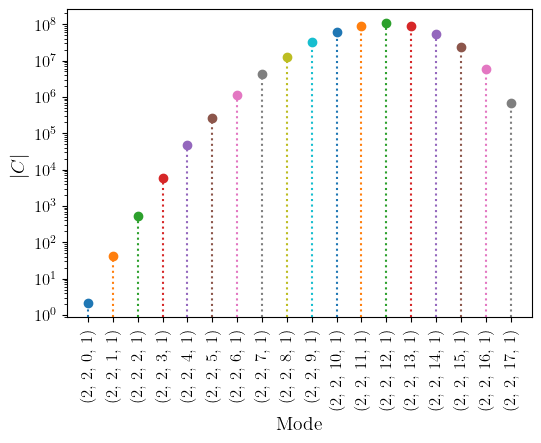

In [9]:
qnmfits.plot_mode_amplitudes(best_fit['C'], best_fit['mode_labels'], log=True)

In [10]:
for n in range(N_fit+1):
    print(f"C{n} = {abs(best_fit['C'][n])}")

C0 = 2.090631641826492
C1 = 41.104634196745685
C2 = 533.2957782766213
C3 = 5697.670848760666
C4 = 46402.54334916797
C5 = 257310.30334687055
C6 = 1129596.4997512328
C7 = 4176891.423548444
C8 = 12796755.278552452
C9 = 31493194.542521186
C10 = 60992696.295135275
C11 = 91547428.86133364
C12 = 104776778.28665987
C13 = 89424749.73514625
C14 = 54983003.11187555
C15 = 22973950.318157986
C16 = 5832738.669286695
C17 = 678530.6900076694


In [11]:
mode_dict = {}

for n in range(N_fit+1):
    mode_dict[n] = qnmfits.ringdown(
        best_fit['model_times'], 
        best_fit['t0'], 
        [best_fit['C'][n]], 
        [best_fit['frequencies'][n]]
    )

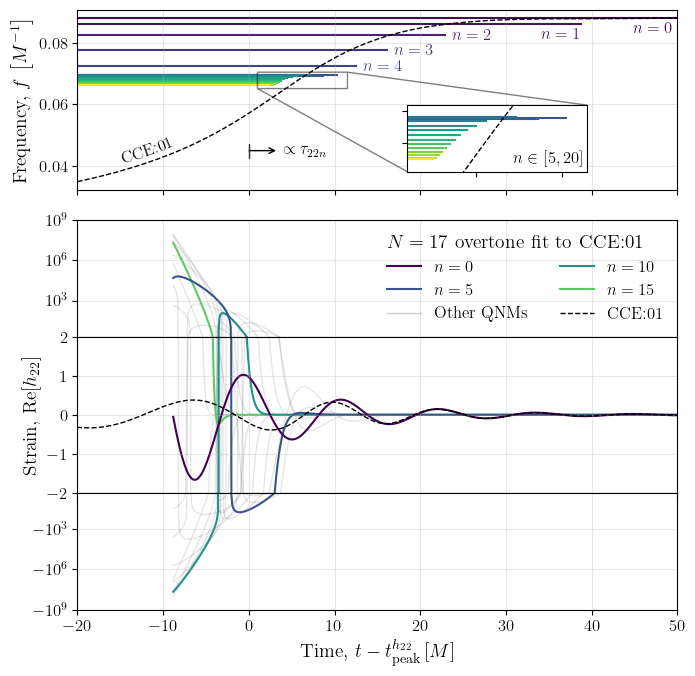

In [12]:
fig = plt.figure(figsize=(6, 6))

xlim = (-20, 50)
plot_mask = (sim.times > xlim[0]) & (sim.times < xlim[1])

cmap = plt.cm.viridis # cm.berlin

frequency_gridspec = fig.add_gridspec(
    1, 1, top=1, bottom=0.7, left=0, right=1
)
ax0 = frequency_gridspec.subplots()

time_gridspec = fig.add_gridspec(
    3, 1, top=0.65, bottom=0, left=0, right=1, height_ratios=[0.75, 1, 0.75], hspace=0
)
ax1 = fig.add_subplot(time_gridspec[0, 0])
ax2 = fig.add_subplot(time_gridspec[1, 0])
ax3 = fig.add_subplot(time_gridspec[2, 0])

x1, x2, y1, y2 = 1, 11.5, 0.06617267560332424-0.001, 0.0694970293126936+0.001
axins = ax0.inset_axes(
    [0.55, 0.1, 0.3, 0.37],
    xlim=(x1, x2), 
    ylim=(y1, y2), 
    xticklabels=[], 
    yticklabels=[],
)
inset_indicator = ax0.indicate_inset_zoom(
    axins, edgecolor='k'
)
inset_indicator.connectors[0].set_visible(True)
inset_indicator.connectors[1].set_visible(False)
inset_indicator.connectors[2].set_visible(False)
inset_indicator.connectors[3].set_visible(True)

for ax in [ax0, ax1, ax2]:
    ax.set_xticklabels([])

ax1.set_yscale('log')
ax3.set_yscale('log')

ax0.grid(visible=True, alpha=0.3)

for ax in [ax1, ax2, ax3]:
    ax.grid(visible=True, which='major', alpha=0.3)

# ---

for i, (ell, m, n, sign) in enumerate(qnm_list):
    omega = qnmfits.qnm.omega(ell, m, n, sign, chif, Mf)
    f = np.real(omega)/(2*np.pi)
    tau = -1/np.imag(omega)
    c = cmap(n/20)
    alpha = 1
    lw = 1.5
    zorder = 1
    for ax in [ax0, axins]:
        ax.plot(
            [-25, 10*tau],
            [f, f] ,
            c=c, 
            lw=lw, 
            alpha=alpha, 
            zorder=zorder
        )
    if n == 0:
        ax0.text(
            0.992, 
            f-0.001, 
            f'$n = {n}$',
            ha='right', 
            va='top', 
            color=c,
            fontsize=12,
            transform=ax0.get_yaxis_transform()
        )
    if n == 1:
        ax0.text(
            10*tau, 
            f-0.001, 
            f'$n = {n}$',
            ha='right', 
            va='top', 
            color=c,
            fontsize=12,
        )
    if n in [2, 3, 4]:
        ax0.text(
            10*tau+0.75, 
            f, 
            f'$n = {n}$',
            ha='left', 
            va='center', 
            color=c,
            fontsize=12,
        )
axins.text(
    0.98,
    0.075,
    '$n \in [5,20]$',
    va='bottom',
    ha='right',
    fontsize=12,
    color='k',
    transform=axins.transAxes
)

for ax in [ax0, axins]:
    ax.plot(sim.times[plot_mask], sim.foft[2,2][plot_mask], c='k', lw=1, ls='--')

start_index = 55
text = utils.CurvedText(
    x=sim.times[plot_mask][start_index:],
    y=sim.foft[2,2][plot_mask][start_index:]+0.001,
    text='CCE:01',
    va='bottom',
    axes=ax0,
    fontsize=12
)

# ---

ax2.plot(sim.times, np.real(sim.h[2,2]), c='k', lw=1, ls='--', label='CCE:01')

for n in range(N_fit, -1, -1):

    if n in [0, 5, 10, 15]:
        c = cmap(n/20)
        alpha = 1
        lw = 1.5
        zorder = 1
        label = f'$n = {n}$'
    else:
        c = 'k'
        alpha = 0.1
        lw = 1
        zorder = 0.9
        label=None

    for ax in [ax1, ax2]:
        ax.plot(
            best_fit['model_times'], 
            np.real(mode_dict[n]), 
            c=c, 
            alpha=alpha, 
            lw=lw,
            zorder=zorder,
            label=label
        )

    ax3.plot(
        best_fit['model_times'], 
        -np.real(mode_dict[n]), 
        c=c, 
        alpha=alpha, 
        lw=lw,
        zorder=zorder
    )

ylim = ax0.get_ylim()

# ---

x_tail = 0-0.3
y_tail = 0.045
x_head = 3.5
y_head = y_tail

arrow = mpatches.FancyArrowPatch(
    (x_tail, y_tail), 
    (x_head, y_head),
    arrowstyle=']->, widthA=0.5, lengthA=0',
    mutation_scale=10,
)
ax0.add_patch(arrow)
ax0.text(
    x_head+0.5, 
    y_head, 
    r'$\propto \tau_{22n}$',
    ha='left', 
    va='center', 
    fontsize=12,
    color='k'
)

# ---

handles = [
    plt.Line2D([0], [0], color=cmap(n/20), lw=1.5) for n in [0, 5, 10, 15]
]
labels = [
    f'$n = {n}$' for n in [0, 5, 10, 15]
]
handles = [
    handles[0],
    handles[1],
    plt.Line2D([0], [0], color='k', lw=1, alpha=0.2),
    handles[2],
    handles[3],
    plt.Line2D([0], [0], color='k', lw=1, ls='--'),
]
labels = [
    labels[0],
    labels[1],
    'Other QNMs',
    labels[2],
    labels[3],
    'CCE:01',
]

legend = ax1.legend(
    handles, 
    labels, 
    loc='upper right', 
    ncol=2,
    bbox_to_anchor=(1.0, 1),
    title='$N = 17$ overtone fit to CCE:01',
    frameon=False,
)
legend._legend_box.align = 'left'

# ---

ax3.set_xlabel('Time, $t - t_\mathrm{peak}^{h_{22}}\, [M]$')
ax0.set_ylabel(r'Frequency, $f\, \left[ M^{-1} \right]$')
ax2.set_ylabel('Strain, $\mathrm{Re}[ h_{22} ]$')

for ax in [ax0, ax1, ax2, ax3]:
    ax.set_xlim(xlim)

ax0.set_ylim(ylim)

scale_switch = 2
ax1.set_ylim(scale_switch, 1e9)
ax2.set_ylim(-scale_switch, scale_switch)
ax3.set_ylim(scale_switch, 1e9)

ax3.invert_yaxis()
ax3.set_yticks(
    ticks=[1e3, 1e6, 1e9],
    labels=['$-10^3$', '$-10^6$', '$-10^9$'],
)

fig.savefig('figures/overtone_morphology.pdf', bbox_inches='tight')